<a href="https://colab.research.google.com/github/shamothibail/DL-Lab-Experiments-/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing
from tensorflow.keras.datasets import imdb
# Load the IMDb dataset
vocab_size = 10000  # Use the top 10,000 words in the dataset
max_len = 200  # Pad or truncate reviews to 200 tokens
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)
# Pad sequences to ensure all inputs are the same length
train_data = preprocessing.sequence.pad_sequences(train_data, maxlen=max_len)
test_data = preprocessing.sequence.pad_sequences(test_data, maxlen=max_len)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    # Embedding layer
    layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),

    # LSTM layer
    layers.LSTM(128, return_sequences=False),

    # Fully connected layer with ReLU activation
    layers.Dense(64, activation='relu'),

    # Output layer with a single neuron and sigmoid activation
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=5,
                    batch_size=32, validation_data=(test_data, test_labels))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 462s 586ms/step - accuracy: 0.7021 - loss: 0.5506 - val_accuracy: 0.8117 - val_loss: 0.3834
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 425s 488ms/step - accuracy: 0.8837 - loss: 0.2878 - val_accuracy: 0.8748 - val_loss: 0.3055
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 393s 502ms/step - accuracy: 0.9311 - loss: 0.1824 - val_accuracy: 0.8605 - val_loss: 0.4047
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 433s 490ms/step - accuracy: 0.9486 - loss: 0.1423 - val_accuracy: 0.8691 - val_loss: 0.3780
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 437s 484ms/step - accuracy: 0.9713 - loss: 0.0864 - val_accuracy: 0.8504 - val_loss: 0.4291


In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')


782/782 - 94s - 121ms/step - accuracy: 0.8504 - loss: 0.4291

Test accuracy: 0.8504


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define a sample word_index (typically generated during training using a tokenizer)
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")  # Example: Vocabulary size is 10,000
sample_texts = [
    "This movie was fantastic",
    "I loved the plot",
    "The movie was terrible and boring"
]
tokenizer.fit_on_texts(sample_texts)
word_index = tokenizer.word_index  # Maps words to their indices

# Define a max_len (maximum length for padding)
max_len = 10  # Example: Pad sequences to a length of 10

# Define a sample model (for demonstration purposes)
model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=max_len),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# For the purpose of demonstration, random weights are used.
# In practice, you would load a pre-trained model using model.load_weights('path_to_weights.h5')

# Example: Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Example of predicting a single new review (padded to max_len)
new_review = "This movie was fantastic! I loved it."
tokenized_review = [1] + [word_index.get(w, 2) for w in new_review.split()]
tokenized_review = preprocessing.sequence.pad_sequences([tokenized_review], maxlen=max_len)
prediction = model.predict(tokenized_review)
print(f"Sentiment score (0 to 1): {prediction[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
Sentiment score (0 to 1): 0.5006474852561951


BERT Model


In [1]:
pip install transformers

In [ ]:


from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import tensorflow as tf

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

train_texts = ["I love this movie!", "This is terrible."]
test_texts = ["Amazing experience!", "Not good."]

# Tokenize the text data
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=128)

# Convert the data into TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
)).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
)).batch(16)

# Compile and train the model
model.compile(optimizer=Adam(learning_rate=2e-5),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_dataset, epochs=3, validation_data=test_dataset)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x7f4fa092d8d0>

In [3]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Input texts and corresponding labels
train_texts = ["I love this movie!", "This is terrible."]
train_labels = [1, 0]  # 1: Positive, 0: Negative

test_texts = ["Amazing experience!", "Not good."]
test_labels = [1, 0]

# Tokenize the text data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128, return_tensors="tf")
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128, return_tensors="tf")

# Convert the data into TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    tf.convert_to_tensor(train_labels)
)).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    tf.convert_to_tensor(test_labels)
)).batch(16)

# Compile and train the model
model.compile(optimizer=Adam(learning_rate=2e-5),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_dataset, epochs=3, validation_data=test_dataset)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x7ad6a84f8c40>

expt.1 installing keras, tensorflow AND pytorch

In [10]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# Create a simple neural network
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),  # Adjusted input shape to match input data
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 units (for classification)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Example training data (adjusted for shape)
x_train = np.array([[1], [2], [3], [4]])  # Reshaped as 2D array
y_train = np.array([0, 1, 2, 3])  # Simplified labels for categorical classification

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=2)  # Reduced batch size to match small dataset

# Test data (for evaluation)
x_test = np.array([[5], [6]])
y_test = np.array([4, 5])  # Simplified labels for test examples

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,538 (9.91 KB)

 Trainable params: 2,538 (9.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3333 - loss: 2.2704
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3333 - loss: 2.1752 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1667 - loss: 2.2199     
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1667 - loss: 2.1971     
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1667 - loss: 2.2039     
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3333 - loss: 2.1457 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3333 - loss: 2.1284 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3333 - loss: 2.0905 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3333 - loss: 2.0951
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3333 - loss: 2.0783 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1667 - loss: 2.0772    
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accur

Expt. 2 CNN on CV problems


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.3311 - loss: 1.7891

782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.3313 - loss: 1.7885 - val_accuracy: 0.5174 - val_loss: 1.3277
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - accuracy: 0.5376 - loss: 1.2902 - val_accuracy: 0.5758 - val_loss: 1.1894
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.6063 - loss: 1.1116 - val_accuracy: 0.6264 - val_loss: 1.0445
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.6543 - loss: 0.9940 - val_accuracy: 0.6650 - val_loss: 0.9548
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.6773 - loss: 0.9173 - val_accuracy: 0.6476 - val_loss: 1.0314
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 99ms/step - accuracy: 0.7050 - loss: 0.8420 - val_accuracy: 0.6867 - val_loss: 0.8998
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 82ms/step - accuracy: 0.7224 - loss: 0.7900 - val_accuracy: 0.6945 - val_loss: 0.8704
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.7412 - loss: 0.7386 - val_accur

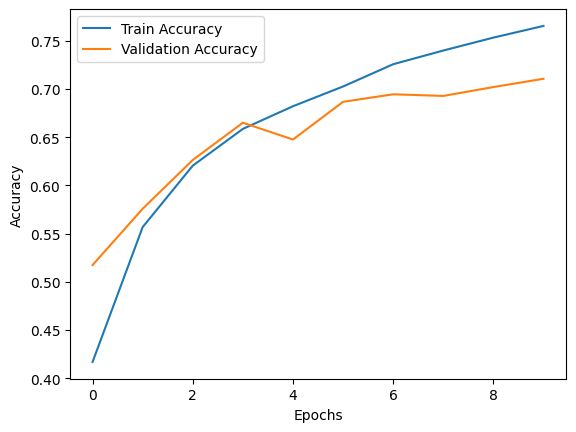

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # First convolutional layer
    layers.MaxPooling2D((2, 2)),  # First max pooling
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    layers.MaxPooling2D((2, 2)),  # Second max pooling
    layers.Conv2D(64, (3, 3), activation='relu'),  # Third convolutional layer
    layers.Flatten(),  # Flatten the feature maps to feed into dense layers
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Expt.4

Image classification on MNIST dataset(CNN model with fully connected layer)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 0.8984 - loss: 0.3449 - val_accuracy: 0.9848 - val_loss: 0.0452
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9848 - loss: 0.0488 - val_accuracy: 0.9888 - val_loss: 0.0350
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 50ms/step - accuracy: 0.9900 - loss: 0.0319 - val_accuracy: 0.9904 - val_loss: 0.0285
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.9924 - loss: 0.0230 - val_accuracy: 0.9885 - val_loss: 0.0329
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.9952 - loss: 0.0156 - val_accuracy: 0.9896 - val_loss: 0.0319
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9965 - loss: 0.0113 - val_accuracy: 0.9912 - val_loss: 0.0271
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9967 - loss: 0.0106 - val_accuracy: 0.9897 - val_loss: 0.0328
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9976 - loss: 0.0069 - 

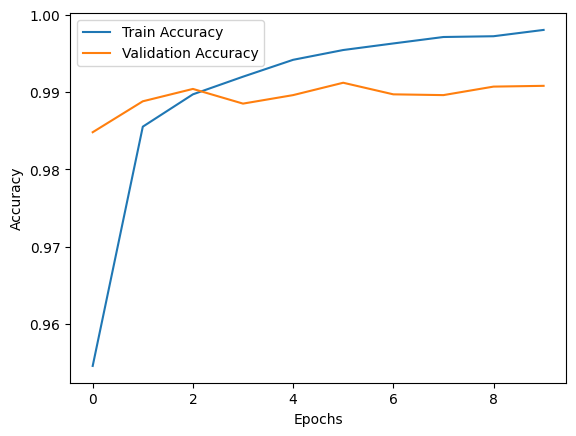

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Reshape and normalize
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    layers.MaxPooling2D((2, 2)),  # Max pooling
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    layers.MaxPooling2D((2, 2)),  # Second max pooling
    layers.Flatten(),  # Flatten feature maps
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Expt 5

Applying Deep Learning Model in the Field of Natural Language Processing

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing
from tensorflow.keras.datasets import imdb

# Load and preprocess the IMDB dataset
vocab_size = 10000  # Use the top 10,000 words
max_len = 200  # Limit each review to 200 words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

# Define the LSTM model
model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),  # Word embeddings
    layers.LSTM(128, return_sequences=False),  # LSTM layer
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

expt. 6

Train a Sentiment Analysis Model on IMDB Dataset Use RNN Layers With LSTM/GRU Notes

In [3]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
import np_utils
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb

max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
model.add(LSTM(128, dropout_W=0.2, dropout_U=0.2))  # try using a GRU instead, for fun
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=10,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

ModuleNotFoundError: No module named 'np_utils'

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 252s 635ms/step - accuracy: 0.7028 - loss: 0.5428 - val_accuracy: 0.8664 - val_loss: 0.3237
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 236s 569ms/step - accuracy: 0.8992 - loss: 0.2534 - val_accuracy: 0.8637 - val_loss: 0.3199
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 222s 569ms/step - accuracy: 0.9361 - loss: 0.1725 - val_accuracy: 0.8578 - val_loss: 0.3489
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 259s 560ms/step - accuracy: 0.9555 - loss: 0.1222 - val_accuracy: 0.8637 - val_loss: 0.3746
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 260s 557ms/step - accuracy: 0.9696 - loss: 0.0832 - val_accuracy: 0.8665 - val_loss: 0.4318
782/782 - 76s - 97ms/step - accuracy: 0.8665 - loss: 0.4318
Test Accuracy: 0.8665199875831604


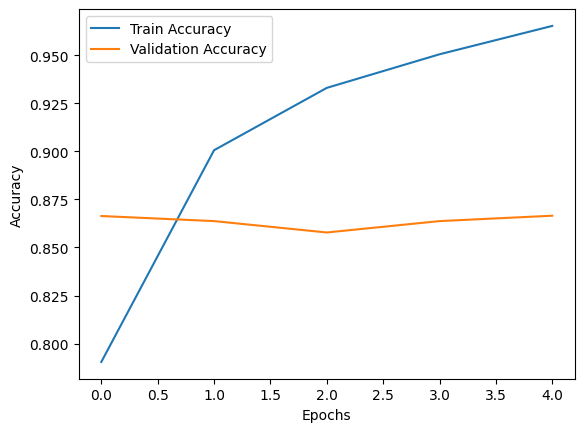

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

# Load and preprocess the IMDB dataset
vocab_size = 10000  # Top 10,000 words
max_len = 200  # Maximum review length

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

# Define the model (use LSTM or GRU)
model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),  # Embedding layer
    layers.LSTM(128, return_sequences=False),  # Use layers.GRU(128) for GRU instead
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

expt. 7

Applying the Autoencoder Algorithms for Encoding the Real-World Data

(60000, 784)
(10000, 784)


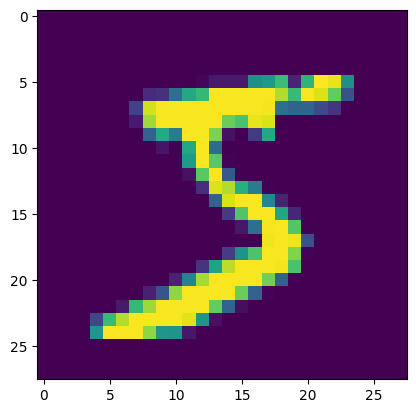

In [28]:
#import all the dependencies
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
encoding_dim = 15
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)
# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
plt.imshow(x_train[0].reshape(28,28))

In [29]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.4175 - val_loss: 0.2285
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2148 - val_loss: 0.1840
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1796 - val_loss: 0.1641
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1628 - val_loss: 0.1542
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1542 - val_loss: 0.1492
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1495 - val_loss: 0.1461
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1466 - val_loss: 0.1435
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1443 - val_loss: 0.1415
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1426 - val_loss: 0.1399
Epoch 10/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1408 - val_loss: 0.1385
Epoch 11/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1395 - val_loss: 0.1371
Epoch 12/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


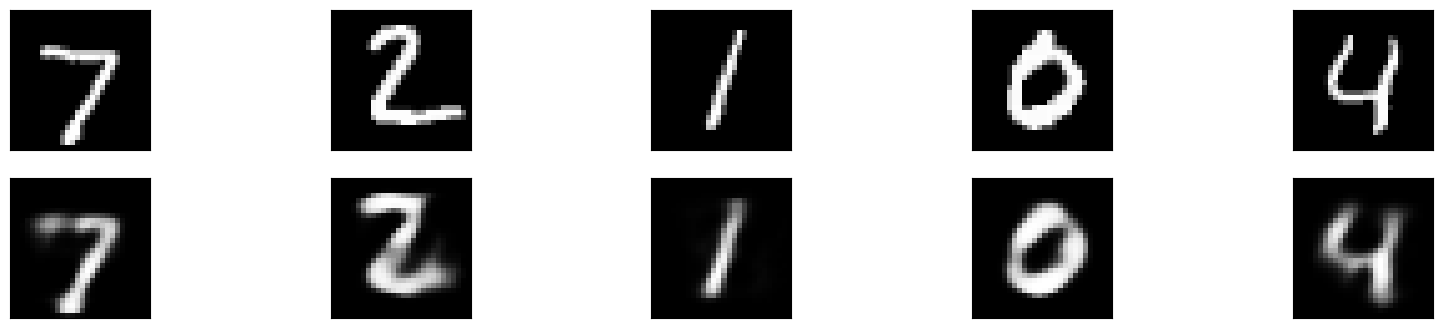

In [30]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

expt. 8

Applying Generative adversarial networks for image generation and unsupervised tasks.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 367ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0, D Loss: 0.6884987354278564, G Loss: [array(0.6898485, dtype=float32), array(0.6898485, dtype=float32), array(0.6171875, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


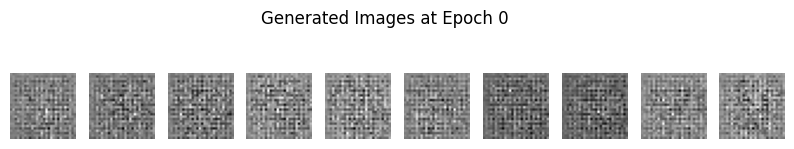

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 358ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

KeyboardInterrupt: 

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, _), (_, _) = mnist.load_data()  # Ignore labels
x_train = x_train.astype('float32') / 255.0  # Normalize to [0, 1]
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape for input to CNN

# Define constants
latent_dim = 100  # Size of the random noise vector
batch_size = 64
epochs = 10000  # Total number of training iterations

# Generator Model
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(7 * 7 * 256, input_dim=latent_dim),
        layers.Reshape((7, 7, 256)),
        layers.BatchNormalization(),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation='tanh')  # Output: 28x28x1
    ])
    return model

# Discriminator Model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(28, 28, 1)),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')  # Output: real or fake
    ])
    return model

# Build models
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Combined GAN model
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(latent_dim,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Function to train the GAN
def train_gan(x_train, epochs, batch_size):
    for epoch in range(epochs):
        # Train Discriminator
        real_images = x_train[np.random.randint(0, x_train.shape[0], batch_size)]
        fake_images = generator.predict(np.random.normal(0, 1, (batch_size, latent_dim)))
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        misleading_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, misleading_labels)

        # Display progress
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")
            generate_and_save_images(generator, epoch)

# Function to generate and save images
def generate_and_save_images(generator, epoch, n_images=10):
    noise = np.random.normal(0, 1, (n_images, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale from [-1, 1] to [0, 1]

    plt.figure(figsize=(10, 2))
    for i in range(n_images):
        plt.subplot(1, n_images, i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Generated Images at Epoch {epoch}")
    plt.show()

# Train the GAN
train_gan(x_train, epochs, batch_size)